In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
daibetes=load_diabetes()

In [4]:
print(daibetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
print(daibetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [6]:
x=pd.DataFrame(daibetes.data,columns=daibetes.feature_names)
y=daibetes.target
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


In [7]:
df=x
df["price"]=y

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  price   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,price
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
df.isnull().sum()

age      0
sex      0
bmi      0
bp       0
s1       0
s2       0
s3       0
s4       0
s5       0
s6       0
price    0
dtype: int64

In [11]:
cor=df.corr()

<Axes: >

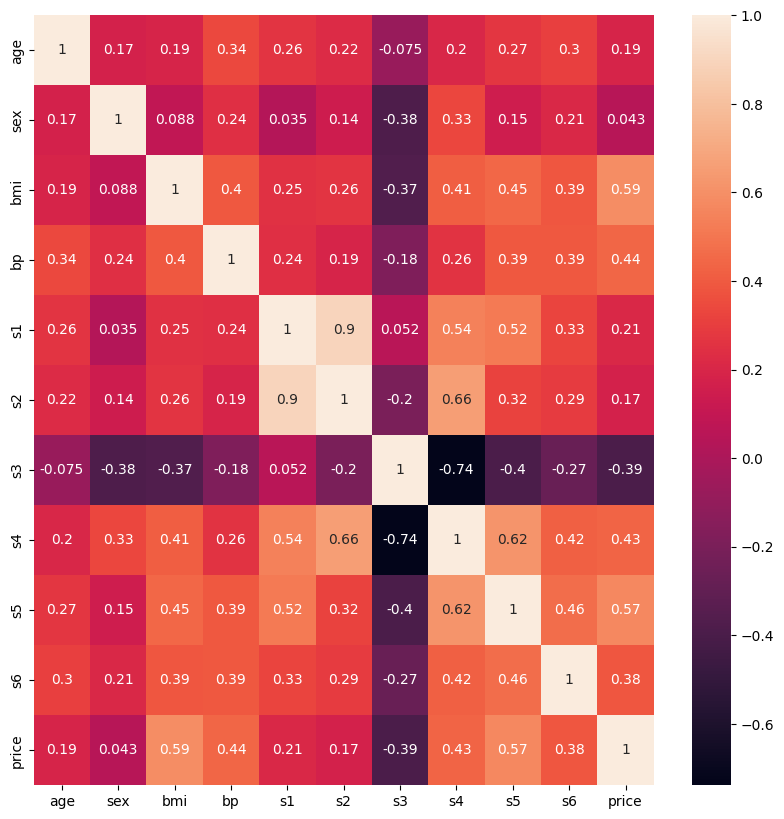

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [37]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

In [14]:
cor.iloc[1,2]

np.float64(0.08816139902276221)

In [36]:
def feature_drop(dataset,threshold):
    imp_feature=set()
    matrix=dataset.corr()
    for i in range(len(matrix.columns)) :
        for j in range(i):
            if matrix.iloc[i,j]>threshold :
                col_name=matrix.columns[i]
                imp_feature.add(col_name)
    return imp_feature
                
    

In [41]:
x.drop(columns=list(feature_drop(x,0.85)),inplace=True)
x.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

In [38]:
x.columns
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s3      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## model training 
im gonna use all the regression model for this and evaluted the performation through there metrics 
1. linear model 
2. polynomial model 
3. ridge (with and without cv)
4. lasso(with and without cv)
5. elastic net 
6. svm regression
7. knn regression
8. DT regression 
9. random forest regressor
10. adaboost,gradeint boost , xgboost

Which Metric to Use?
## R-squared:
 Use this to get a quick "goodness of fit" score. An $R^2$ of 0.85 means your model explains 85% of the data's variance.
## MAE:
 This is the best metric for business interpretation. It's in the same units as your target. (e.g., "On average, the model's price prediction is off by $500.")
 ## RMSE: 
 This is the most common metric for technical evaluation. By squaring the error before rooting it, it penalizes large errors much more heavily than MAE. It's also in the same units as your target, making it interpretable.

In [43]:
#preprocessing 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline 

#metrics
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score,mean_absolute_error

#model importing 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

#cv model
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV



In [44]:
from scipy.stats import loguniform
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
param_grid={"model__alpha":np.logspace(-4,4,9)}
ridge_grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(max_iter=5000))
])
lasso_param_dist={'model__alpha': loguniform(1e-4, 1e1)}
lasso_random_search = RandomizedSearchCV(
    estimator=lasso_pipeline,
    param_distributions=lasso_param_dist,
    n_iter=100,  # Try 100 random combinations
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

In [45]:
models={
    "Linear_model":Pipeline([("scale",StandardScaler()),("model",LinearRegression())]),
    "polynomial_model":Pipeline([('poly',PolynomialFeatures(degree=3)),('scale',StandardScaler()),('model',LinearRegression())]),
    "Ridge (GridSearchCV)": ridge_grid_search,
    "Lasso (RandomizedSearchCV)": lasso_random_search,
    "elasticnet": Pipeline([("scaling",StandardScaler()),("model",ElasticNet(alpha=1.0,l1_ratio=0.5))]),
    "SVM Regression (SVR)": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf'))
    ]),
    
    "KNN Regression (k=5)": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor(n_neighbors=5))
    ]),
    
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
     
}

In [46]:
results_list = []

for name, model in models.items():
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store metrics in a dictionary
    results_list.append({
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    })
    result_df=pd.DataFrame(results_list)

In [47]:
result_df

,Model,R2 Score,MAE,MSE,RMSE
0,Linear_model,0.484466,41.468322,2850.742137,53.392342
1,polynomial_model,-2.792763,101.282527,20972.801513,144.819893
2,Ridge (GridSearchCV),0.488001,41.460832,2831.193633,53.208962
3,Lasso (RandomizedSearchCV),0.485023,41.461931,2847.665154,53.363519
4,elasticnet,0.482966,42.974303,2859.038624,53.469979
5,SVM Regression (SVR),0.190200,56.792588,4477.945235,66.917451
6,KNN Regression (k=5),0.439938,42.610811,3096.969730,55.650424
7,Decision Tree,-0.001669,56.252252,5538.918919,74.423914
8,Random Forest,0.456868,43.416396,3003.351903,54.802846
9,AdaBoost,0.442614,45.372263,3082.169383,55.517289


In [48]:
result_df_sorted = result_df.sort_values(by="RMSE", ascending=True,inplace=True)

In [49]:
result_df

,Model,R2 Score,MAE,MSE,RMSE
2,Ridge (GridSearchCV),0.488001,41.460832,2831.193633,53.208962
3,Lasso (RandomizedSearchCV),0.485023,41.461931,2847.665154,53.363519
0,Linear_model,0.484466,41.468322,2850.742137,53.392342
4,elasticnet,0.482966,42.974303,2859.038624,53.469979
8,Random Forest,0.456868,43.416396,3003.351903,54.802846
9,AdaBoost,0.442614,45.372263,3082.169383,55.517289
6,KNN Regression (k=5),0.439938,42.610811,3096.969730,55.650424
10,Gradient Boosting,0.425665,44.275840,3175.896271,56.355091
11,XGBoost,0.341111,47.833331,3643.450037,60.360998
5,SVM Regression (SVR),0.190200,56.792588,4477.945235,66.917451
